In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


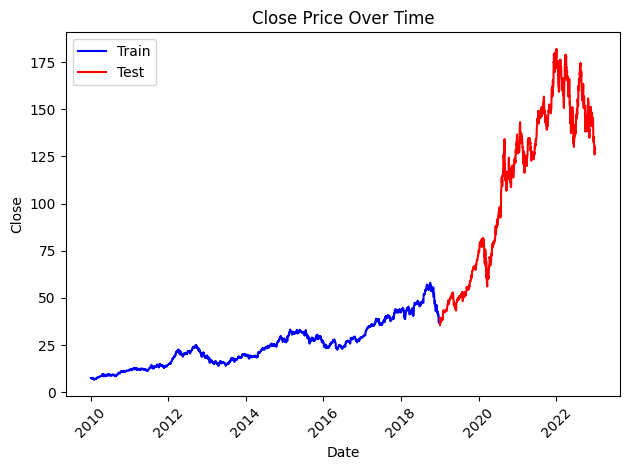

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('AAPL',start_date,end_date,2019)
data.data_preprocess()

Running ring
GENERATION 0 START
Generation 0: Best fitness = 4.060977142771889 Average Fitness = 3.3439077626790574
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 4.1769131090354055 Average Fitness = 3.480264228044775
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 4.1769131090354055 Average Fitness = 3.574795119832823
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 4.1769131090354055 Average Fitness = 3.6330980136962205
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 4.295748578676717 Average Fitness = 3.6216941591494622
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 4.295748578676717 Average Fitness = 3.62968028487519
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 4.295748578676717 Average Fitness = 3.7249163647690713
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 4.357905670341364 Average Fitness = 3.758984822894067
GENERATION 7 END
GENERATION 8 START
Generation

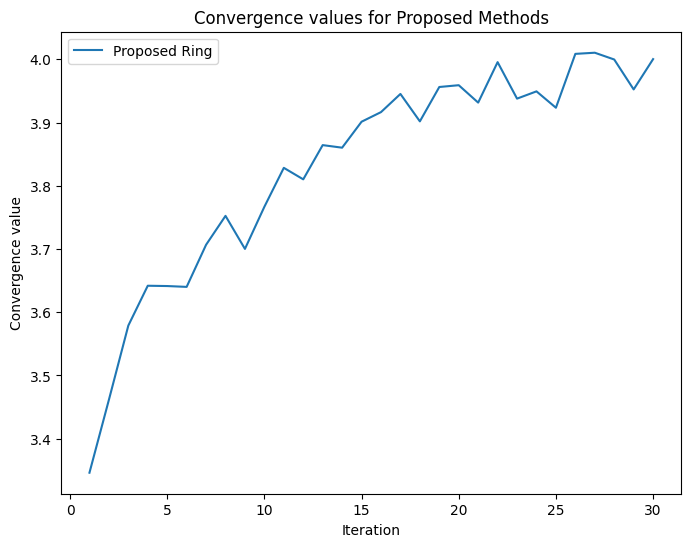

In [3]:
import numpy as np
import matplotlib.pyplot as plt

evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]
evolve_strategy = ["ring"]
num_runs = 2 # Number of runs to perform

convergence_values = []

for i in evolve_strategy:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,K=5, num_islands=8, m_iter=10, num_iter=30, pSize=50, r_cross=0.4, r_mut=0.1,
                       strategies=data.strategies, evolve_strategy=i)
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    plt.plot(np.arange(1, 31), convergence_values[i], label='Proposed ' + str(evolve_strategy[i]).capitalize())
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()


In [8]:
ga.globalBest.weights
print(ga.globalBest.wb)

0.7356219397587946
